In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.linear_model import LogisticRegression

pd.set_option('display.max_colwidth', -1)

df = pd.read_csv('tweets.csv', encoding= 'utf-8')

In [5]:
df = df[['handle', 'text', 'is_retweet']]

In [6]:
df = df.loc[df['is_retweet'] == False]

In [7]:
df.head(3)  #the index is a little wonky now, let's reset it

,handle,text,is_retweet
0,HillaryClinton,The question in this election: Who can put the plans into action that will make your life better? https://t.co/XreEY9OicG,False
3,HillaryClinton,"If we stand together, there's nothing we can't do. \n\nMake sure you're ready to vote: https://t.co/tTgeqxNqYm https://t.co/Q3Ymbb7UNy",False
4,HillaryClinton,Both candidates were asked about how they'd confront racial injustice. Only one had a real answer. https://t.co/sjnEokckis,False


In [8]:
df = df.copy().reset_index(drop=True)

In [9]:
df.head()

,handle,text,is_retweet
0,HillaryClinton,The question in this election: Who can put the plans into action that will make your life better? https://t.co/XreEY9OicG,False
1,HillaryClinton,"If we stand together, there's nothing we can't do. \n\nMake sure you're ready to vote: https://t.co/tTgeqxNqYm https://t.co/Q3Ymbb7UNy",False
2,HillaryClinton,Both candidates were asked about how they'd confront racial injustice. Only one had a real answer. https://t.co/sjnEokckis,False
3,realDonaldTrump,"Join me for a 3pm rally - tomorrow at the Mid-America Center in Council Bluffs, Iowa! Tickets:… https://t.co/dfzsbICiXc",False
4,HillaryClinton,This election is too important to sit out. Go to https://t.co/tTgeqxNqYm and make sure you're registered. #NationalVoterRegistrationDay -H,False


In [10]:
df['is_trump'] = df['handle'].apply(lambda x: 1 if x== 'realDonaldTrump' else 0) 

In [11]:
df.head()

,handle,text,is_retweet,is_trump
0,HillaryClinton,The question in this election: Who can put the plans into action that will make your life better? https://t.co/XreEY9OicG,False,0
1,HillaryClinton,"If we stand together, there's nothing we can't do. \n\nMake sure you're ready to vote: https://t.co/tTgeqxNqYm https://t.co/Q3Ymbb7UNy",False,0
2,HillaryClinton,Both candidates were asked about how they'd confront racial injustice. Only one had a real answer. https://t.co/sjnEokckis,False,0
3,realDonaldTrump,"Join me for a 3pm rally - tomorrow at the Mid-America Center in Council Bluffs, Iowa! Tickets:… https://t.co/dfzsbICiXc",False,1
4,HillaryClinton,This election is too important to sit out. Go to https://t.co/tTgeqxNqYm and make sure you're registered. #NationalVoterRegistrationDay -H,False,0


# PREPROCESSING

In [12]:
df['text'] = df['text'].replace('http\S+', '', regex=True).replace('www\S+', '', regex=True).replace('\n\n\S+', '', regex=True)

In [13]:
# in regular expressions, the S+ is looking for any non-whitespace characters that come after the http, www or \n\n

In [14]:
df.head()

,handle,text,is_retweet,is_trump
0,HillaryClinton,The question in this election: Who can put the plans into action that will make your life better?,False,0
1,HillaryClinton,"If we stand together, there's nothing we can't do. sure you're ready to vote:",False,0
2,HillaryClinton,Both candidates were asked about how they'd confront racial injustice. Only one had a real answer.,False,0
3,realDonaldTrump,"Join me for a 3pm rally - tomorrow at the Mid-America Center in Council Bluffs, Iowa! Tickets:…",False,1
4,HillaryClinton,This election is too important to sit out. Go to and make sure you're registered. #NationalVoterRegistrationDay -H,False,0


In [15]:
# This function is going to remove punctuation and make the text lower case

In [16]:
def remove_punctuation(text):
    lower = text.lower()  #will change text to all lower case
    exclude = string.punctuation  #punctuation marks
    return "".join(ch for ch in lower if ch not in exclude) #this is going to iterate through each character, then rejoin them

In [17]:
df['no_punc'] = df['text'].apply(remove_punctuation)

In [18]:
df.head()

,handle,text,is_retweet,is_trump,no_punc
0,HillaryClinton,The question in this election: Who can put the plans into action that will make your life better?,False,0,the question in this election who can put the plans into action that will make your life better
1,HillaryClinton,"If we stand together, there's nothing we can't do. sure you're ready to vote:",False,0,if we stand together theres nothing we cant do sure youre ready to vote
2,HillaryClinton,Both candidates were asked about how they'd confront racial injustice. Only one had a real answer.,False,0,both candidates were asked about how theyd confront racial injustice only one had a real answer
3,realDonaldTrump,"Join me for a 3pm rally - tomorrow at the Mid-America Center in Council Bluffs, Iowa! Tickets:…",False,1,join me for a 3pm rally tomorrow at the midamerica center in council bluffs iowa tickets…
4,HillaryClinton,This election is too important to sit out. Go to and make sure you're registered. #NationalVoterRegistrationDay -H,False,0,this election is too important to sit out go to and make sure youre registered nationalvoterregistrationday h


In [19]:
#Now we're going to take our text down to their root words using Porter Stemmer.

# #porter stemmer is going to takes the word down to it's root form. 
# Stems are created by removing the suffixes or prefixes used with a word.
# We can see how this works in an example:



In [20]:
# stemmer = PorterStemmer() 

# words = ['snacks', 'snacked, 'eating', 'sustainance']
# p = [stemmer.stem(word) for word in words]


In [21]:
stemmer = PorterStemmer()  #instantiate stemmer


In [22]:
def split_and_stem(string):
    word = ""
    string = string.split(' ')
    for i in string:
        word += (stemmer.stem(i) + " ")
    return word

In [23]:
df['stem'] = df['no_punc'].apply(split_and_stem)

In [24]:
df.head()

,handle,text,is_retweet,is_trump,no_punc,stem
0,HillaryClinton,The question in this election: Who can put the plans into action that will make your life better?,False,0,the question in this election who can put the plans into action that will make your life better,the question in thi elect who can put the plan into action that will make your life better
1,HillaryClinton,"If we stand together, there's nothing we can't do. sure you're ready to vote:",False,0,if we stand together theres nothing we cant do sure youre ready to vote,if we stand togeth there noth we cant do sure your readi to vote
2,HillaryClinton,Both candidates were asked about how they'd confront racial injustice. Only one had a real answer.,False,0,both candidates were asked about how theyd confront racial injustice only one had a real answer,both candid were ask about how theyd confront racial injustic onli one had a real answer
3,realDonaldTrump,"Join me for a 3pm rally - tomorrow at the Mid-America Center in Council Bluffs, Iowa! Tickets:…",False,1,join me for a 3pm rally tomorrow at the midamerica center in council bluffs iowa tickets…,join me for a 3pm ralli tomorrow at the midamerica center in council bluff iowa tickets…
4,HillaryClinton,This election is too important to sit out. Go to and make sure you're registered. #NationalVoterRegistrationDay -H,False,0,this election is too important to sit out go to and make sure youre registered nationalvoterregistrationday h,thi elect is too import to sit out go to and make sure your regist nationalvoterregistrationday h


In [25]:
df['is_trump'].value_counts()

1    3093
0    2629
Name: is_trump, dtype: int64

In [26]:
df['stem'].head()

0    the question in thi elect who can put the plan into action that will make your life better         
1    if we stand togeth there noth we cant do  sure your readi to vote                                  
2    both candid were ask about how theyd confront racial injustic onli one had a real answer           
3    join me for a 3pm ralli  tomorrow at the midamerica center in council bluff iowa tickets…          
4    thi elect is too import to sit out go to  and make sure your regist nationalvoterregistrationday h 
Name: stem, dtype: object

# MODELING

In [256]:
X = df['stem']
y = df['is_trump']

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [264]:
cvec = CountVectorizer(stop_words = 'english')

In [265]:
X_train  = pd.DataFrame(cvec.fit_transform(X_train).todense(),
             columns=cvec.get_feature_names())

In [266]:
len(df_train.columns)

6610

In [267]:
X_test = pd.DataFrame(cvec.transform(X_test).todense(),
             columns=cvec.get_feature_names())

In [268]:
lr = LogisticRegression()

In [269]:
lr.fit(X_train, y_train)

/Users/heatherrobbins/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [270]:
lr.score(X_train, y_train)

0.9886388464059428

In [271]:
lr.score(X_test, y_test)

0.914410480349345

In [276]:
predictions = lr.predict(X_test)

In [323]:
pred_proba = lr.predict_proba(X_test)[:,1]

In [324]:
def metrics(y_test, y_predict, pred_proba):
    print('Accuracy score %s ' % accuracy_score(y_test, y_predict), '\n')
    print('----------------------------------------------------------------')
    print(pd.DataFrame(confusion_matrix(y_test, y_predict), 
                            index=['Actually_Hillary', 'Actual_Trump'], 
                            columns=['Predicted_Hillary', 'Predicted_Trump']), '\n')
    print('-----------------------------------------------------------------')
    print(classification_report(y_test, y_predict))
    print('-----------------------------------------------------------------')
    print('ROC_AUC SCORE %s ' %roc_auc_score(y_test, pred_proba))

In [325]:
metrics(y_test, predictions, pred_proba)

Accuracy score 0.914410480349345  

----------------------------------------------------------------
                  Predicted_Hillary  Predicted_Trump
Actually_Hillary  480                42             
Actual_Trump      56                 567             

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       522
           1       0.93      0.91      0.92       623

   micro avg       0.91      0.91      0.91      1145
   macro avg       0.91      0.91      0.91      1145
weighted avg       0.91      0.91      0.91      1145

-----------------------------------------------------------------
ROC_AUC SCORE 0.9750588857524154 


In [326]:
FPR = dict()
TPR = dict()
ROC_AUC = dict()

In [327]:
roc_curve(y_test, pred_proba)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00191571,
        0.00191571, 0.00383142, 0.00383142, 0.00574713, 0.00574713,
        0.00766284, 0.00766284, 0.00957854, 0.00957854, 0.00957854,
        0.00957854, 0.01149425, 0.01149425, 0.01340996, 0.01340996,
        0.01340996, 0.01340996, 0.01532567, 0.01532567, 0.01724138,
        0.01724138, 0.01915709, 0.01915709, 0.0210728 , 0.0210728 ,
        0.02298851, 0.02298851, 0.02490421, 0.02490421, 0.02681992,
        0.02681992, 0.02873563, 0.02873563, 0.03639847, 0.03639847,
        0.03831418, 0.03831418, 0.04022989, 0.04022989, 0.0440613 ,
        0.0440613 , 0.04597701, 0.04597701, 0.04789272, 0.04789272,
        0.05172414, 0.05172414, 0.05363985, 0.05363985, 0.05747126,
        0.05747126, 0.05938697, 0.05938697, 0.06321839, 0.06321839,
        0.07088123, 0.07088123, 0.07471264, 0.07471264, 0.08045977,
        0.08045977, 0.08237548, 0.08237548, 0.08

In [328]:
FPR[1], TPR[1], _ = roc_curve(y_test, pred_proba)
ROC_AUC[1] = auc(FPR[1], TPR[1])

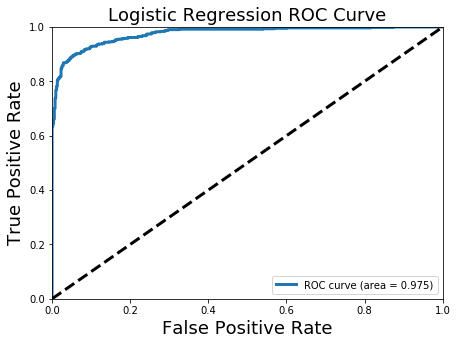

In [329]:
plt.figure(figsize=[7,5])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.3f)' % ROC_AUC[1], linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=3)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Logistic Regression ROC Curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [391]:
# Let's say we wanted to shift the probability threshold...

In [402]:
lr_probs = pd.DataFrame(lr.predict_proba(X_test), columns=['class_0_prediction(Hillary)','class_1_prediction(Trump)'])
lr_probs.head()

,class_0_prediction(Hillary),class_1_prediction(Trump)
0,0.951202,0.048798
1,0.931777,0.068223
2,0.287943,0.712057
3,0.983109,0.016891
4,0.168874,0.831126


In [393]:
logreg_preds['pred_class_thresh10'] = [1 if x >= 0.10 else 0 for x in logreg_preds.class_1_prediction.values]
# print(knn_predictions.iloc[0:10])

In [403]:
y_preds_shifted = logreg_preds['pred_class_thresh10']

In [398]:
y_preds_shifted

0       0
1       0
2       1
3       0
4       1
5       1
6       1
7       0
8       1
9       1
10      0
11      1
12      1
13      0
14      1
15      1
16      0
17      0
18      1
19      1
20      1
21      1
22      1
23      1
24      0
25      0
26      1
27      1
28      1
29      1
       ..
1115    0
1116    1
1117    1
1118    1
1119    1
1120    1
1121    0
1122    0
1123    1
1124    1
1125    1
1126    1
1127    1
1128    1
1129    1
1130    1
1131    0
1132    0
1133    1
1134    1
1135    1
1136    0
1137    1
1138    1
1139    1
1140    1
1141    0
1142    1
1143    1
1144    1
Name: pred_class_thresh10, Length: 1145, dtype: int64